In [1]:
import os
import sys
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder

# Add the parent directory to path to import your modules
os.chdir("../..")
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from lib import *


Sparsity with L1 penalty: 78.94%
Test score with L1 penalty: 0.8198
Example run in 6.023 s


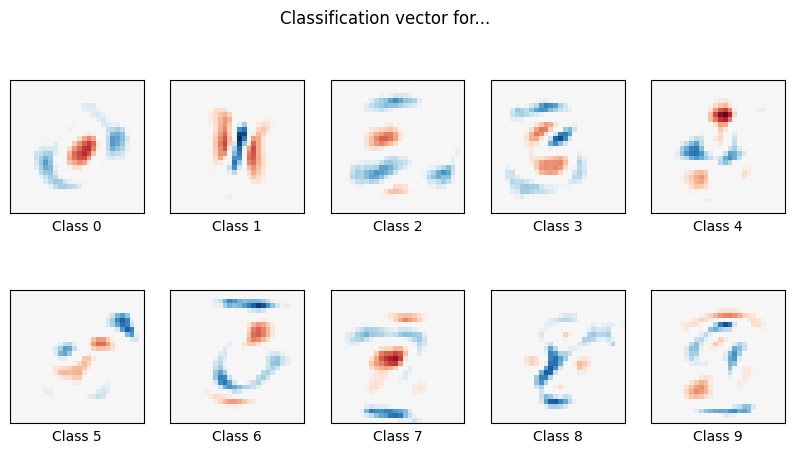

In [2]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [3]:
# Convert labels to one-hot encoding for neural network
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Create validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train_onehot, test_size=0.2, random_state=42
)

# Print dataset information
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {y_train_onehot.shape[1]}")

Training set: 4000 samples
Validation set: 1000 samples
Test set: 10000 samples
Input features: 784
Output classes: 10


### Pengaruh Depth

In [ ]:
# Define depth variations with 3, 4, and 5 layers
depth_variations = [
    [784, 156, 10],
    [784, 156, 156, 10],
    [784, 156, 156, 156, 10]
]


# Define width variations with 128, 328, 528 neurons in the hidden layers
width_variations = [
    [784, 128, 10],
    [784, 328, 10],
    [784, 528, 10]
]

In [5]:
# Create Neural Network
depth_3_network = NeuralNetwork(
    node_counts = depth_variations[0],
    activations = [ReLU()] * (len(depth_variations[0]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

depth_4_network = NeuralNetwork(
    node_counts = depth_variations[1],
    activations = [ReLU()] * (len(depth_variations[1]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

depth_5_network = NeuralNetwork(
    node_counts = depth_variations[2],
    activations = [ReLU()] * (len(depth_variations[2]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

In [6]:
# Create FFNN model
ffnn_depth_3 = FFNN(depth_3_network)

ffnn_depth_4 = FFNN(depth_4_network)

ffnn_depth_5 = FFNN(depth_5_network)

In [7]:
# Train the model
depth_3_history = ffnn_depth_3.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

depth_4_history = ffnn_depth_4.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

depth_5_history = ffnn_depth_5.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 174.34it/s, loss=10.1895]


Epoch 1/20 - 0.73s - loss: 10.1895 - val_loss: 4.6722


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 147.34it/s, loss=3.5630]


Epoch 2/20 - 0.87s - loss: 3.5630 - val_loss: 2.8940


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 206.04it/s, loss=2.3112]


Epoch 3/20 - 0.63s - loss: 2.3112 - val_loss: 2.5076


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 192.49it/s, loss=1.7453]


Epoch 4/20 - 0.68s - loss: 1.7453 - val_loss: 2.3101


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 191.59it/s, loss=1.4116]


Epoch 5/20 - 0.67s - loss: 1.4116 - val_loss: 2.1932


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 209.28it/s, loss=1.1679]


Epoch 6/20 - 0.62s - loss: 1.1679 - val_loss: 2.0398


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 174.02it/s, loss=0.9892]


Epoch 7/20 - 0.76s - loss: 0.9892 - val_loss: 2.0161


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 182.15it/s, loss=0.8685]


Epoch 8/20 - 0.72s - loss: 0.8685 - val_loss: 1.9185


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 215.46it/s, loss=0.7524]


Epoch 9/20 - 0.63s - loss: 0.7524 - val_loss: 1.8646


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 179.35it/s, loss=0.6682]


Epoch 10/20 - 0.73s - loss: 0.6682 - val_loss: 1.8129


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 225.81it/s, loss=0.5946]


Epoch 11/20 - 0.57s - loss: 0.5946 - val_loss: 1.7996


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 147.99it/s, loss=0.5427]


Epoch 12/20 - 0.90s - loss: 0.5427 - val_loss: 1.7729


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 128.27it/s, loss=0.5051]


Epoch 13/20 - 1.08s - loss: 0.5051 - val_loss: 1.7680


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 143.02it/s, loss=0.4691]


Epoch 14/20 - 0.91s - loss: 0.4691 - val_loss: 1.7636


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 126.68it/s, loss=0.4382]


Epoch 15/20 - 1.01s - loss: 0.4382 - val_loss: 1.7050


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 147.04it/s, loss=0.4129]


Epoch 16/20 - 0.89s - loss: 0.4129 - val_loss: 1.7247


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 137.84it/s, loss=0.3930]


Epoch 17/20 - 0.93s - loss: 0.3930 - val_loss: 1.7110


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 125.43it/s, loss=0.3784]


Epoch 18/20 - 1.03s - loss: 0.3784 - val_loss: 1.7120


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 122.34it/s, loss=0.3668]


Epoch 19/20 - 1.07s - loss: 0.3668 - val_loss: 1.7224


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 145.63it/s, loss=0.3473]


Epoch 20/20 - 0.89s - loss: 0.3473 - val_loss: 1.7107


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 136.85it/s, loss=15.6688]


Epoch 1/20 - 0.95s - loss: 15.6688 - val_loss: 9.1374


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 160.64it/s, loss=8.3613]


Epoch 2/20 - 0.81s - loss: 8.3613 - val_loss: 7.2466


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 157.17it/s, loss=6.6053]


Epoch 3/20 - 0.83s - loss: 6.6053 - val_loss: 7.0934


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 141.36it/s, loss=5.9669]


Epoch 4/20 - 0.92s - loss: 5.9669 - val_loss: 6.2736


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 137.33it/s, loss=5.4313]


Epoch 5/20 - 0.95s - loss: 5.4313 - val_loss: 6.0439


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 132.26it/s, loss=4.9827]


Epoch 6/20 - 0.98s - loss: 4.9827 - val_loss: 6.1159


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 108.98it/s, loss=4.8130]


Epoch 7/20 - 1.18s - loss: 4.8130 - val_loss: 6.0941


Epoch 8/20: 100%|██████████| 125/125 [00:01<00:00, 123.95it/s, loss=4.5577]


Epoch 8/20 - 1.04s - loss: 4.5577 - val_loss: 5.6281


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 105.47it/s, loss=2.8950]


Epoch 9/20 - 1.25s - loss: 2.8950 - val_loss: 3.6375


Epoch 10/20: 100%|██████████| 125/125 [00:01<00:00, 124.08it/s, loss=1.9107]


Epoch 10/20 - 1.03s - loss: 1.9107 - val_loss: 3.1881


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 143.06it/s, loss=1.4901]


Epoch 11/20 - 0.90s - loss: 1.4901 - val_loss: 3.1877


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 111.94it/s, loss=1.3023]


Epoch 12/20 - 1.15s - loss: 1.3023 - val_loss: 3.1059


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 108.67it/s, loss=1.2039]


Epoch 13/20 - 1.21s - loss: 1.2039 - val_loss: 3.1329


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 98.40it/s, loss=1.1555]


Epoch 14/20 - 1.31s - loss: 1.1555 - val_loss: 3.0047


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 124.43it/s, loss=1.1076]


Epoch 15/20 - 1.05s - loss: 1.1076 - val_loss: 3.0732


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 139.23it/s, loss=1.0786]


Epoch 16/20 - 0.94s - loss: 1.0786 - val_loss: 3.1566


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 130.20it/s, loss=1.0759]


Epoch 17/20 - 0.99s - loss: 1.0759 - val_loss: 3.0770


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 77.01it/s, loss=1.0325] 


Epoch 18/20 - 1.73s - loss: 1.0325 - val_loss: 2.9985


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 127.83it/s, loss=1.0183]


Epoch 19/20 - 1.02s - loss: 1.0183 - val_loss: 2.9458


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 141.59it/s, loss=1.0115]


Epoch 20/20 - 0.90s - loss: 1.0115 - val_loss: 2.9561


Epoch 1/20: 100%|██████████| 125/125 [00:01<00:00, 113.87it/s, loss=25.6406]


Epoch 1/20 - 1.12s - loss: 25.6406 - val_loss: 24.1766


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 93.16it/s, loss=22.5321]


Epoch 2/20 - 1.37s - loss: 22.5321 - val_loss: 20.3674


Epoch 3/20: 100%|██████████| 125/125 [00:01<00:00, 89.08it/s, loss=21.1775]


Epoch 3/20 - 1.55s - loss: 21.1775 - val_loss: 20.2485


Epoch 4/20: 100%|██████████| 125/125 [00:01<00:00, 85.25it/s, loss=21.0641] 


Epoch 4/20 - 1.54s - loss: 21.0641 - val_loss: 20.0492


Epoch 5/20: 100%|██████████| 125/125 [00:01<00:00, 82.21it/s, loss=20.7213]


Epoch 5/20 - 1.57s - loss: 20.7213 - val_loss: 20.0505


Epoch 6/20: 100%|██████████| 125/125 [00:01<00:00, 64.79it/s, loss=20.7475]


Epoch 6/20 - 2.13s - loss: 20.7475 - val_loss: 20.2597


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 80.30it/s, loss=20.7010]


Epoch 7/20 - 1.60s - loss: 20.7010 - val_loss: 20.1282


Epoch 8/20: 100%|██████████| 125/125 [00:01<00:00, 92.97it/s, loss=20.5825]


Epoch 8/20 - 1.39s - loss: 20.5825 - val_loss: 19.7856


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 108.05it/s, loss=20.1772]


Epoch 9/20 - 1.19s - loss: 20.1772 - val_loss: 19.1870


Epoch 10/20: 100%|██████████| 125/125 [00:01<00:00, 86.84it/s, loss=19.6845]


Epoch 10/20 - 1.47s - loss: 19.6845 - val_loss: 18.6841


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 81.65it/s, loss=19.3382]


Epoch 11/20 - 1.57s - loss: 19.3382 - val_loss: 18.7143


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 76.06it/s, loss=18.9083]


Epoch 12/20 - 1.66s - loss: 18.9083 - val_loss: 18.4856


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 80.44it/s, loss=18.9332]


Epoch 13/20 - 1.59s - loss: 18.9332 - val_loss: 18.3572


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 82.85it/s, loss=19.1199]


Epoch 14/20 - 1.58s - loss: 19.1199 - val_loss: 18.8750


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 96.21it/s, loss=18.9887] 


Epoch 15/20 - 1.33s - loss: 18.9887 - val_loss: 17.9954


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 93.66it/s, loss=18.5724] 


Epoch 16/20 - 1.38s - loss: 18.5724 - val_loss: 17.9540


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 111.01it/s, loss=17.1819]


Epoch 17/20 - 1.15s - loss: 17.1819 - val_loss: 16.1186


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 85.78it/s, loss=16.7158]


Epoch 18/20 - 1.49s - loss: 16.7158 - val_loss: 16.3205


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 85.67it/s, loss=16.1930]


Epoch 19/20 - 1.48s - loss: 16.1930 - val_loss: 15.9830


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 97.82it/s, loss=16.3053]


Epoch 20/20 - 1.30s - loss: 16.3053 - val_loss: 15.3893


In [8]:
# Evaluate the model
evaluate_model(ffnn_depth_3, X_test, y_test_onehot)

evaluate_model(ffnn_depth_4, X_test, y_test_onehot)

evaluate_model(ffnn_depth_5, X_test, y_test_onehot)


----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8233000000
Precision (macro)    0.8244363618
Recall (macro)       0.8216177327
F1 Score (macro)     0.8221891758
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8514000000
Precision (macro)    0.8519176168
Recall (macro)       0.8502652613
F1 Score (macro)     0.8499188507
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.5324000000
Precision (macro)    0.3465329181
Recall (macro)       0.5252515830
F1 Score (macro)     0.4043920317
------------------------------


/home/dovodedomo/Tugas-Besar-I-ML/myenv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


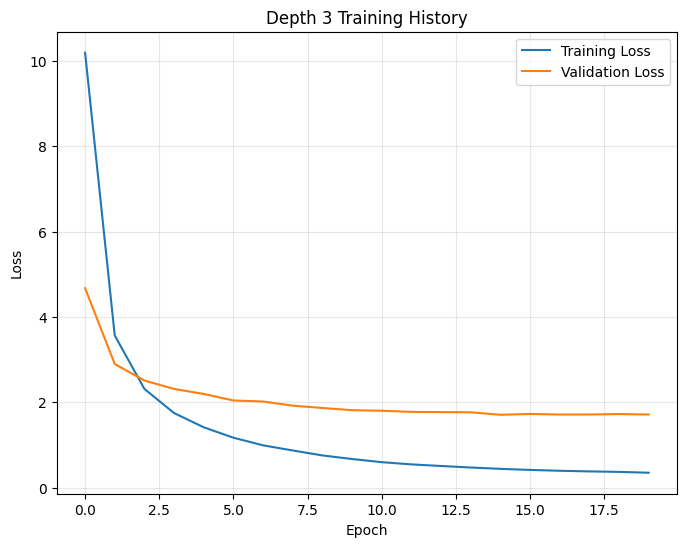

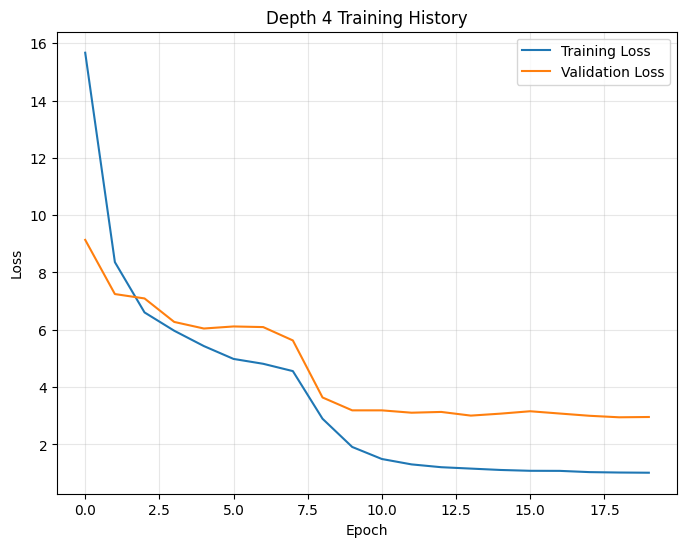

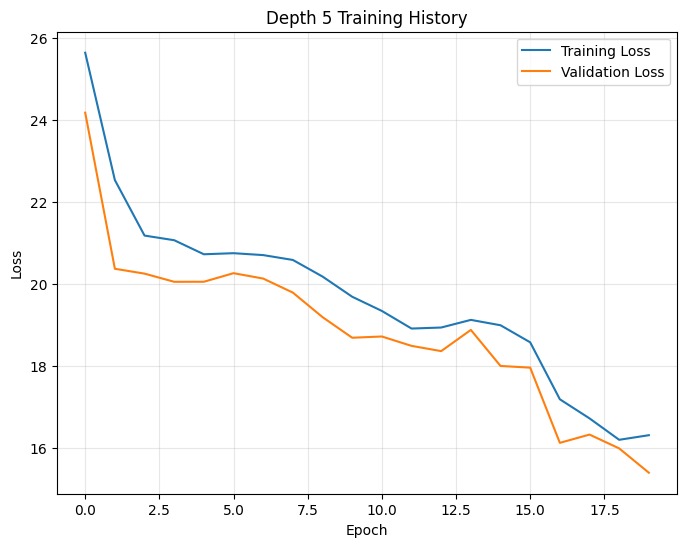

In [9]:
# Plot the training history
plot_training_loss(depth_3_history, "Depth 3 Training History")

plot_training_loss(depth_4_history, "Depth 4 Training History")

plot_training_loss(depth_5_history, "Depth 5 Training History")

### Pengaruh Width

In [10]:
# Create Neural Network
width_128_network = NeuralNetwork(
    node_counts = width_variations[0],
    activations = [ReLU()] * (len(width_variations[0]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

width_328_network = NeuralNetwork(
    node_counts = width_variations[1],
    activations = [ReLU()] * (len(width_variations[1]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

width_528_network = NeuralNetwork(
    node_counts = width_variations[2],
    activations = [ReLU()] * (len(width_variations[2]) - 2) + [Softmax()],
    loss_function = CCE(),
    initialize_methods = NormalInitializer(seed=22)
)

In [11]:
# Create FFNN model
ffnn_width_128 = FFNN(width_128_network)

ffnn_width_328 = FFNN(width_328_network)

ffnn_width_528 = FFNN(width_528_network)

In [12]:
# Train the model
width_128_history = ffnn_width_128.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

width_328_history = ffnn_width_328.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

width_528_history = ffnn_width_528.fit(
    x_train=X_train,
    y_train=y_train,
    batch_size=32,
    epochs=20,
    validation_data=(X_val, y_val),
    learning_rate=0.01,
    verbose=1
)

Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 244.46it/s, loss=10.3924]


Epoch 1/20 - 0.54s - loss: 10.3924 - val_loss: 5.2410


Epoch 2/20: 100%|██████████| 125/125 [00:00<00:00, 205.77it/s, loss=4.1404]


Epoch 2/20 - 0.65s - loss: 4.1404 - val_loss: 3.2913


Epoch 3/20: 100%|██████████| 125/125 [00:00<00:00, 189.67it/s, loss=2.6270]


Epoch 3/20 - 0.68s - loss: 2.6270 - val_loss: 2.5573


Epoch 4/20: 100%|██████████| 125/125 [00:00<00:00, 180.71it/s, loss=1.9606]


Epoch 4/20 - 0.72s - loss: 1.9606 - val_loss: 2.3134


Epoch 5/20: 100%|██████████| 125/125 [00:00<00:00, 210.13it/s, loss=1.5438]


Epoch 5/20 - 0.62s - loss: 1.5438 - val_loss: 2.0946


Epoch 6/20: 100%|██████████| 125/125 [00:00<00:00, 178.83it/s, loss=1.2700]


Epoch 6/20 - 0.73s - loss: 1.2700 - val_loss: 1.9911


Epoch 7/20: 100%|██████████| 125/125 [00:00<00:00, 184.39it/s, loss=1.0821]


Epoch 7/20 - 0.70s - loss: 1.0821 - val_loss: 1.8368


Epoch 8/20: 100%|██████████| 125/125 [00:00<00:00, 178.09it/s, loss=0.9401]


Epoch 8/20 - 0.72s - loss: 0.9401 - val_loss: 1.8238


Epoch 9/20: 100%|██████████| 125/125 [00:00<00:00, 210.79it/s, loss=0.8355]


Epoch 9/20 - 0.62s - loss: 0.8355 - val_loss: 1.7813


Epoch 10/20: 100%|██████████| 125/125 [00:00<00:00, 212.62it/s, loss=0.7391]


Epoch 10/20 - 0.61s - loss: 0.7391 - val_loss: 1.6909


Epoch 11/20: 100%|██████████| 125/125 [00:00<00:00, 192.20it/s, loss=0.6653]


Epoch 11/20 - 0.67s - loss: 0.6653 - val_loss: 1.6498


Epoch 12/20: 100%|██████████| 125/125 [00:00<00:00, 232.55it/s, loss=0.6098]


Epoch 12/20 - 0.56s - loss: 0.6098 - val_loss: 1.6378


Epoch 13/20: 100%|██████████| 125/125 [00:00<00:00, 157.15it/s, loss=0.5596]


Epoch 13/20 - 0.82s - loss: 0.5596 - val_loss: 1.5971


Epoch 14/20: 100%|██████████| 125/125 [00:00<00:00, 206.14it/s, loss=0.5067]


Epoch 14/20 - 0.63s - loss: 0.5067 - val_loss: 1.6040


Epoch 15/20: 100%|██████████| 125/125 [00:00<00:00, 188.55it/s, loss=0.4718]


Epoch 15/20 - 0.69s - loss: 0.4718 - val_loss: 1.6050


Epoch 16/20: 100%|██████████| 125/125 [00:00<00:00, 189.60it/s, loss=0.4434]


Epoch 16/20 - 0.70s - loss: 0.4434 - val_loss: 1.5881


Epoch 17/20: 100%|██████████| 125/125 [00:00<00:00, 194.63it/s, loss=0.4114]


Epoch 17/20 - 0.67s - loss: 0.4114 - val_loss: 1.5933


Epoch 18/20: 100%|██████████| 125/125 [00:00<00:00, 184.32it/s, loss=0.3879]


Epoch 18/20 - 0.72s - loss: 0.3879 - val_loss: 1.5936


Epoch 19/20: 100%|██████████| 125/125 [00:00<00:00, 174.85it/s, loss=0.3709]


Epoch 19/20 - 0.73s - loss: 0.3709 - val_loss: 1.5856


Epoch 20/20: 100%|██████████| 125/125 [00:00<00:00, 217.02it/s, loss=0.3563]


Epoch 20/20 - 0.60s - loss: 0.3563 - val_loss: 1.5786


Epoch 1/20: 100%|██████████| 125/125 [00:00<00:00, 131.25it/s, loss=10.3711]


Epoch 1/20 - 0.97s - loss: 10.3711 - val_loss: 5.1678


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 98.97it/s, loss=3.9434]


Epoch 2/20 - 1.29s - loss: 3.9434 - val_loss: 3.7721


Epoch 3/20: 100%|██████████| 125/125 [00:01<00:00, 96.09it/s, loss=2.6732] 


Epoch 3/20 - 1.34s - loss: 2.6732 - val_loss: 3.2676


Epoch 4/20: 100%|██████████| 125/125 [00:01<00:00, 67.66it/s, loss=2.0194]


Epoch 4/20 - 1.88s - loss: 2.0194 - val_loss: 2.9535


Epoch 5/20: 100%|██████████| 125/125 [00:01<00:00, 75.66it/s, loss=1.6270]


Epoch 5/20 - 1.68s - loss: 1.6270 - val_loss: 2.7222


Epoch 6/20: 100%|██████████| 125/125 [00:01<00:00, 85.23it/s, loss=1.3363]


Epoch 6/20 - 1.49s - loss: 1.3363 - val_loss: 2.5266


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 81.37it/s, loss=1.1433]


Epoch 7/20 - 1.59s - loss: 1.1433 - val_loss: 2.4754


Epoch 8/20: 100%|██████████| 125/125 [00:01<00:00, 80.36it/s, loss=1.0208]


Epoch 8/20 - 1.59s - loss: 1.0208 - val_loss: 2.4394


Epoch 9/20: 100%|██████████| 125/125 [00:02<00:00, 55.28it/s, loss=0.9396]


Epoch 9/20 - 2.29s - loss: 0.9396 - val_loss: 2.4644


Epoch 10/20: 100%|██████████| 125/125 [00:01<00:00, 68.09it/s, loss=0.8744]


Epoch 10/20 - 1.86s - loss: 0.8744 - val_loss: 2.4478


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 86.20it/s, loss=0.8270]


Epoch 11/20 - 1.48s - loss: 0.8270 - val_loss: 2.3966


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 81.96it/s, loss=0.7975]


Epoch 12/20 - 1.56s - loss: 0.7975 - val_loss: 2.4200


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 77.95it/s, loss=0.7738]


Epoch 13/20 - 1.63s - loss: 0.7738 - val_loss: 2.4023


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 91.28it/s, loss=0.7415]


Epoch 14/20 - 1.39s - loss: 0.7415 - val_loss: 2.4480


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 95.69it/s, loss=0.7196]


Epoch 15/20 - 1.34s - loss: 0.7196 - val_loss: 2.4535


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 93.63it/s, loss=0.7030]


Epoch 16/20 - 1.37s - loss: 0.7030 - val_loss: 2.4264


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 76.98it/s, loss=0.6902]


Epoch 17/20 - 1.66s - loss: 0.6902 - val_loss: 2.4571


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 73.95it/s, loss=0.6804]


Epoch 18/20 - 1.72s - loss: 0.6804 - val_loss: 2.4413


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 71.20it/s, loss=0.6725]


Epoch 19/20 - 1.80s - loss: 0.6725 - val_loss: 2.4144


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 76.20it/s, loss=0.6646]


Epoch 20/20 - 1.67s - loss: 0.6646 - val_loss: 2.4284


Epoch 1/20: 100%|██████████| 125/125 [00:01<00:00, 69.36it/s, loss=14.1413]


Epoch 1/20 - 1.84s - loss: 14.1413 - val_loss: 5.7864


Epoch 2/20: 100%|██████████| 125/125 [00:01<00:00, 80.09it/s, loss=4.8877]


Epoch 2/20 - 1.60s - loss: 4.8877 - val_loss: 4.0060


Epoch 3/20: 100%|██████████| 125/125 [00:01<00:00, 72.12it/s, loss=3.2473]


Epoch 3/20 - 1.79s - loss: 3.2473 - val_loss: 3.2329


Epoch 4/20: 100%|██████████| 125/125 [00:01<00:00, 68.71it/s, loss=2.5476]


Epoch 4/20 - 1.87s - loss: 2.5476 - val_loss: 3.0652


Epoch 5/20: 100%|██████████| 125/125 [00:01<00:00, 74.49it/s, loss=2.1380]


Epoch 5/20 - 1.70s - loss: 2.1380 - val_loss: 2.8550


Epoch 6/20: 100%|██████████| 125/125 [00:01<00:00, 68.90it/s, loss=1.8198]


Epoch 6/20 - 1.85s - loss: 1.8198 - val_loss: 2.7409


Epoch 7/20: 100%|██████████| 125/125 [00:01<00:00, 63.62it/s, loss=1.6074]


Epoch 7/20 - 2.00s - loss: 1.6074 - val_loss: 2.7350


Epoch 8/20: 100%|██████████| 125/125 [00:01<00:00, 68.26it/s, loss=1.5122]


Epoch 8/20 - 1.86s - loss: 1.5122 - val_loss: 2.7279


Epoch 9/20: 100%|██████████| 125/125 [00:01<00:00, 83.45it/s, loss=1.4245]


Epoch 9/20 - 1.55s - loss: 1.4245 - val_loss: 2.6886


Epoch 10/20: 100%|██████████| 125/125 [00:01<00:00, 74.94it/s, loss=1.3783]


Epoch 10/20 - 1.72s - loss: 1.3783 - val_loss: 2.6307


Epoch 11/20: 100%|██████████| 125/125 [00:01<00:00, 72.20it/s, loss=1.3419]


Epoch 11/20 - 1.77s - loss: 1.3419 - val_loss: 2.5849


Epoch 12/20: 100%|██████████| 125/125 [00:01<00:00, 78.44it/s, loss=1.3151]


Epoch 12/20 - 1.63s - loss: 1.3151 - val_loss: 2.6185


Epoch 13/20: 100%|██████████| 125/125 [00:01<00:00, 83.23it/s, loss=1.3012]


Epoch 13/20 - 1.54s - loss: 1.3012 - val_loss: 2.5841


Epoch 14/20: 100%|██████████| 125/125 [00:01<00:00, 81.41it/s, loss=1.2894]


Epoch 14/20 - 1.57s - loss: 1.2894 - val_loss: 2.5799


Epoch 15/20: 100%|██████████| 125/125 [00:01<00:00, 63.86it/s, loss=1.2693]


Epoch 15/20 - 1.99s - loss: 1.2693 - val_loss: 2.5811


Epoch 16/20: 100%|██████████| 125/125 [00:01<00:00, 71.69it/s, loss=1.2616]


Epoch 16/20 - 1.78s - loss: 1.2616 - val_loss: 2.5883


Epoch 17/20: 100%|██████████| 125/125 [00:01<00:00, 69.82it/s, loss=1.2560]


Epoch 17/20 - 1.82s - loss: 1.2560 - val_loss: 2.5769


Epoch 18/20: 100%|██████████| 125/125 [00:01<00:00, 78.90it/s, loss=1.2511]


Epoch 18/20 - 1.62s - loss: 1.2511 - val_loss: 2.5698


Epoch 19/20: 100%|██████████| 125/125 [00:01<00:00, 68.53it/s, loss=1.2462]


Epoch 19/20 - 1.87s - loss: 1.2462 - val_loss: 2.5605


Epoch 20/20: 100%|██████████| 125/125 [00:01<00:00, 71.00it/s, loss=1.2446]


Epoch 20/20 - 1.79s - loss: 1.2446 - val_loss: 2.5536


In [13]:
# Evaluate the model
evaluate_model(ffnn_width_128, X_test, y_test_onehot)

evaluate_model(ffnn_width_328, X_test, y_test_onehot)

evaluate_model(ffnn_width_528, X_test, y_test_onehot)


----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8307000000
Precision (macro)    0.8290685679
Recall (macro)       0.8291396182
F1 Score (macro)     0.8288167575
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8306000000
Precision (macro)    0.8301740964
Recall (macro)       0.8292553941
F1 Score (macro)     0.8294908768
------------------------------

----- Model Performance Summary -----
Metric               Value     
------------------------------
Accuracy             0.8462000000
Precision (macro)    0.8457486204
Recall (macro)       0.8449861291
F1 Score (macro)     0.8447939786
------------------------------


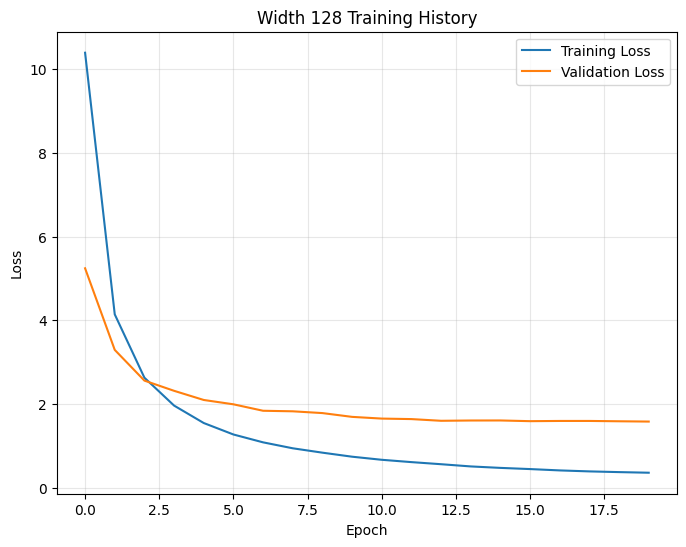

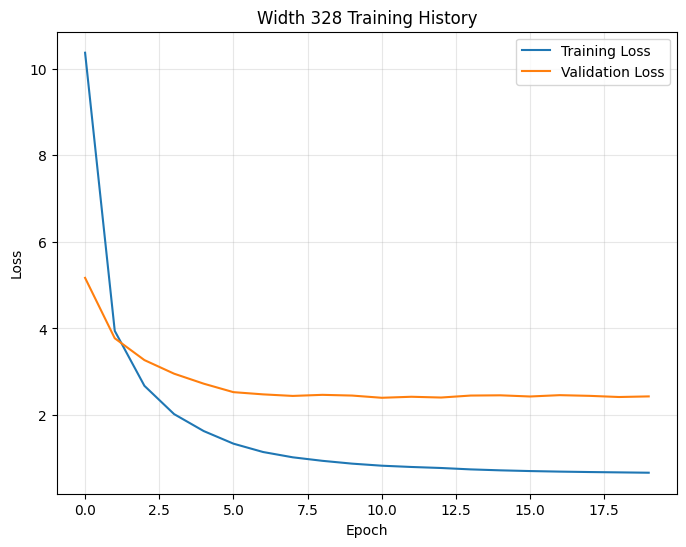

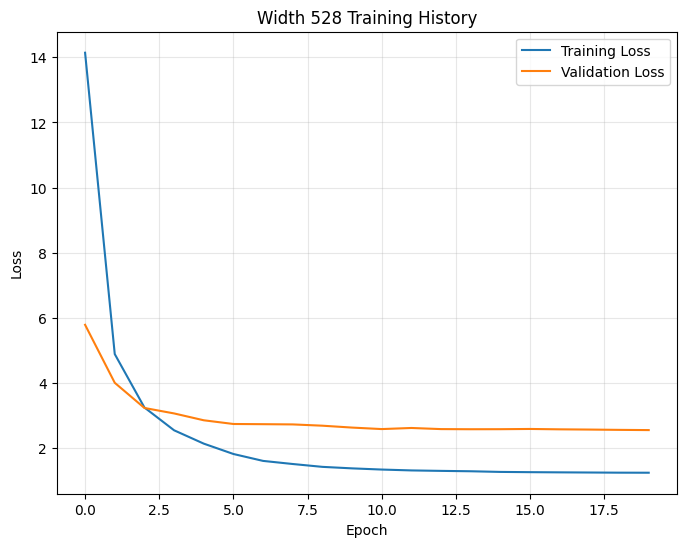

In [14]:
# Plot the training history
plot_training_loss(width_128_history, "Width 128 Training History")

plot_training_loss(width_328_history, "Width 328 Training History")

plot_training_loss(width_528_history, "Width 528 Training History")